In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
DataSetPath = 'train.csv'

# Loading the Dataset
DataSet = pd.read_csv(DataSetPath)

In [47]:
#This command displays the size(rows and features) of the Dataset.
print("Dataset Shape:")
print(DataSet.shape)
print("\n")

#Displays the name of various features and their respective datatypes
print("Dataset Columns/Features:")
print(DataSet.dtypes)

#Displays the first 5 rows of the dataset
DataSet.head()

Dataset Shape:
(73147, 16)


Dataset Columns/Features:
id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


**The Dataset has shape = (73147,16)**

In [4]:
Y_Data = DataSet['is_pass']
X_Data = DataSet

#Splitting the dataset into 7:3 ratio where 70% is the train data and 30% is the test data 
TrainData, TestData, Y_Train, Y_Test_actual = train_test_split(X_Data , Y_Data, test_size=0.3, random_state = 0)

In [5]:
# checking missing data percentage in train data
total = TrainData.isnull().sum().sort_values(ascending = False)
percent = (TrainData.isnull().sum()/TrainData.isnull().count()*100).sort_values(ascending = False)
missing_TrainData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TrainData.head(30)

,Total,Percent
age,19450,37.986797
trainee_engagement_rating,54,0.105465
is_pass,0,0.000000
is_handicapped,0,0.000000
total_programs_enrolled,0,0.000000
city_tier,0,0.000000
education,0,0.000000
gender,0,0.000000
trainee_id,0,0.000000
difficulty_level,0,0.000000


In [6]:
# checking missing data percentage in test data
total = TestData.isnull().sum().sort_values(ascending = False)
percent = (TestData.isnull().sum()/TestData.isnull().count()*100).sort_values(ascending = False)
missing_TestData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TestData.head(30)

,Total,Percent
age,8279,37.726134
trainee_engagement_rating,23,0.104807
is_pass,0,0.000000
is_handicapped,0,0.000000
total_programs_enrolled,0,0.000000
city_tier,0,0.000000
education,0,0.000000
gender,0,0.000000
trainee_id,0,0.000000
difficulty_level,0,0.000000


In [7]:
TrainData.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
72064,8620_58,U_1,U,134,58,offline,intermediate,8620,M,High School Diploma,1,46.0,2,N,4.0,1
66433,98_86,V_3,V,131,86,offline,vary hard,98,F,High School Diploma,4,NaN,2,N,1.0,0
6763,1114_21,T_3,T,134,21,offline,easy,1114,F,No Qualification,1,NaN,2,N,1.0,1
18314,2262_121,Y_4,Y,121,121,online,easy,2262,M,Matriculation,2,26.0,2,N,4.0,1
43803,6505_17,T_4,T,120,17,online,easy,6505,F,High School Diploma,4,25.0,4,N,1.0,1


# VISUALIZATION

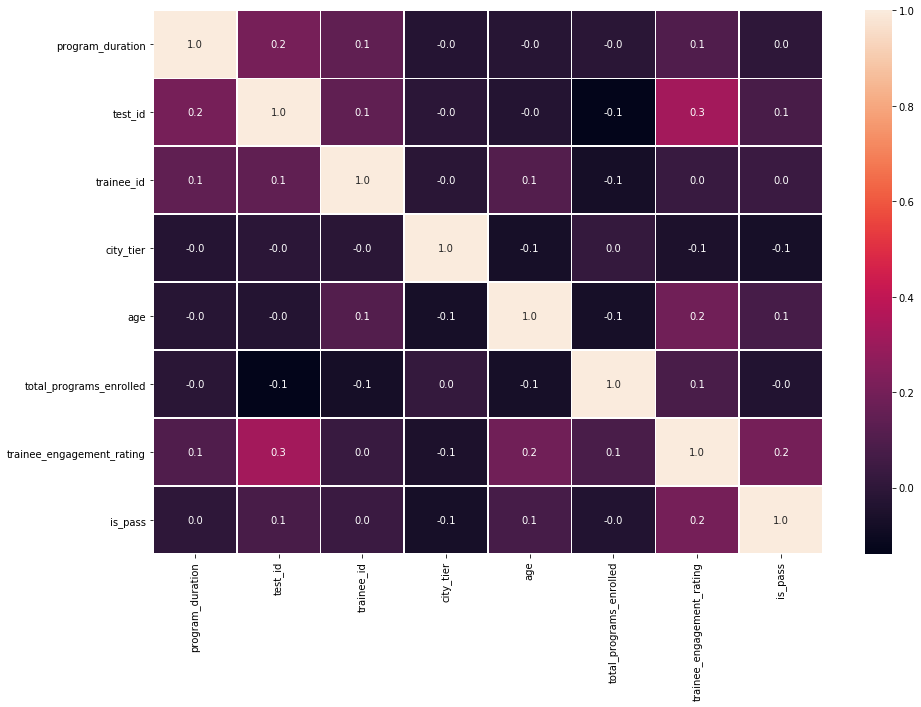

In [8]:
# TRAIN DATA HeatMap
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(TrainData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

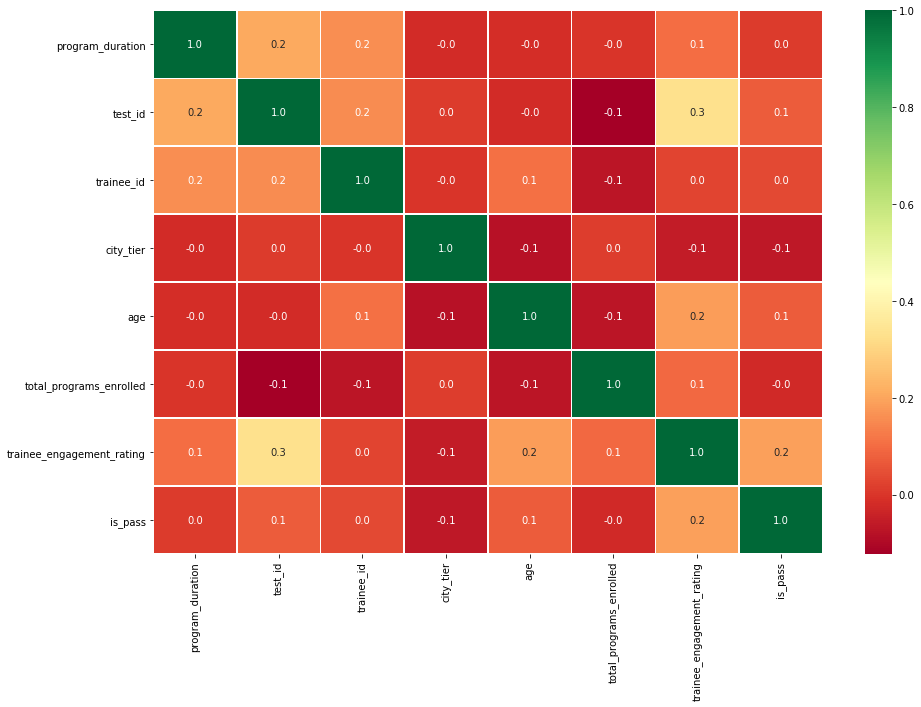

In [9]:
# TEST DATA HeatMap
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(TestData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="RdYlGn")

# Helper Functions

In [10]:
#This function is used for plotting graphs during the bivariate analysis  
def count_plot_by_hue(data_se, hue_se, title, figsize, sort_by_counts=False):
    if sort_by_counts == False:
        order = data_se.unique()
        order.sort()
    else:
        order = data_se.value_counts().index.values
    off_hue = hue_se.nunique()
    off = len(order)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(y=data_se, hue=hue_se, order=order, ax=ax)
    ax.set_title(title)
    patches = ax.patches
    for i, p in enumerate(ax.patches):
        x=p.get_bbox().get_points()[1,0]
        y=p.get_bbox().get_points()[:,1]
        total = x
        p = i
        q = i
        while(q < (off_hue*off)):
            p = p - off
            if p >= 0:
                total = total + (patches[p].get_bbox().get_points()[1,0] if not np.isnan(patches[p].get_bbox().get_points()[1,0]) else 0)
            else:
                q = q + off
                if q < (off*off_hue):
                    total = total + (patches[q].get_bbox().get_points()[1,0] if not np.isnan(patches[q].get_bbox().get_points()[1,0]) else 0)
       
        perc = str(round(100*(x/total), 2)) + " %"
        
        if not np.isnan(x):
            ax.text(x, y.mean(), str(int(x)) + ",  " + perc, va='center')
    plt.show()

In [11]:
# This function returns the count plot of a column with percentage of each class
def plot_bar_counts_categorical(data_se, title, figsize, sort_by_counts=False):
    info = data_se.value_counts()
    info_norm = data_se.value_counts(normalize=True)
    categories = info.index.values
    counts = info.values
    counts_norm = info_norm.values
    fig, ax = plt.subplots(figsize=figsize)
    if data_se.dtype in ['object']:
        if sort_by_counts == False:
            inds = categories.argsort()
            counts = counts[inds]
            counts_norm = counts_norm[inds]
            categories = categories[inds]
        ax = sns.barplot(counts, categories, orient = "h", ax=ax)
        ax.set(xlabel="count", ylabel=data_se.name)
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts):
            ax.text(da, n, str(da)+ ",  " + str(round(counts_norm[n]*100,2)) + " %", fontsize=10, va='center')
    else:
        inds = categories.argsort()
        counts_sorted = counts[inds]
        counts_norm_sorted = counts_norm[inds]
        ax = sns.barplot(categories, counts, orient = "v", ax=ax)
        ax.set(xlabel=data_se.name, ylabel='count')
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts_sorted):
            ax.text(n, da, str(da)+ ",  " + str(round(counts_norm_sorted[n]*100,2)) + " %", fontsize=10, ha='center')

In [12]:
# This function return the multivariable analysis of two dataframe in term of unique column values
def train_test_data_check(train_df, test_df, cols=None, use_all_cols=True):
    if cols == None:
        if use_all_cols:
            train_cols = set(train_df.columns)
            test_cols = set(test_df.columns)
            cols = train_cols.intersection(test_cols)
        else:
            train_cols = set(train_df.select_dtypes(['object', 'category']).columns)
            test_cols = set(test_df.select_dtypes(['object', 'category']).columns)
            cols = train_cols.intersection(test_cols)
        
    for i, col in enumerate(cols):
        display(HTML('<h3><font id="'+ col + '-ttdc' + '" color="blue">' + str(i+1) + ') ' + col + '</font></h3>'))
        print("Datatype : " + str(train_df[col].dtype) )
        print(str(train_df[col].dropna().nunique()) + " unique " + col  + " in Train dataset")
        print(str(test_df[col].dropna().nunique()) + " unique " + col  + " in Test dataset")
        extra = len(set(test_df[col].dropna().unique()) - set(train_df[col].dropna().unique()))
        print(str(extra) + " extra " + col + " in Test dataset")
        if extra == 0:
            display(HTML('<h5><font color="green"> All values present in Test dataset also present in Train dataset for column ' + col + '</font></h5>'))
        else:
            display(HTML('<h5><font color="green">' + str(extra) + ' ' +  col + ' are not present in Train dataset which are in Test dataset</font></h5>'))

In [13]:
train_test_data_check(TrainData, TestData)

Datatype : object
22 unique program_id in Train dataset
22 unique program_id in Test dataset
0 extra program_id in Test dataset


Datatype : object
51202 unique id in Train dataset
21945 unique id in Test dataset
21945 extra id in Test dataset


Datatype : object
2 unique gender in Train dataset
2 unique gender in Test dataset
0 extra gender in Test dataset


Datatype : int64
10 unique program_duration in Train dataset
10 unique program_duration in Test dataset
0 extra program_duration in Test dataset


Datatype : object
2 unique is_handicapped in Train dataset
2 unique is_handicapped in Test dataset
0 extra is_handicapped in Test dataset


Datatype : object
4 unique difficulty_level in Train dataset
4 unique difficulty_level in Test dataset
0 extra difficulty_level in Test dataset


Datatype : object
5 unique education in Train dataset
5 unique education in Test dataset
0 extra education in Test dataset


Datatype : int64
4 unique city_tier in Train dataset
4 unique city_tier in Test dataset
0 extra city_tier in Test dataset


Datatype : float64
5 unique trainee_engagement_rating in Train dataset
5 unique trainee_engagement_rating in Test dataset
0 extra trainee_engagement_rating in Test dataset


Datatype : int64
13 unique total_programs_enrolled in Train dataset
13 unique total_programs_enrolled in Test dataset
0 extra total_programs_enrolled in Test dataset


Datatype : int64
188 unique test_id in Train dataset
188 unique test_id in Test dataset
0 extra test_id in Test dataset


Datatype : int64
17206 unique trainee_id in Train dataset
12499 unique trainee_id in Test dataset
1294 extra trainee_id in Test dataset


Datatype : float64
45 unique age in Train dataset
44 unique age in Test dataset
0 extra age in Test dataset


Datatype : object
2 unique test_type in Train dataset
2 unique test_type in Test dataset
0 extra test_type in Test dataset


Datatype : int64
2 unique is_pass in Train dataset
2 unique is_pass in Test dataset
0 extra is_pass in Test dataset


Datatype : object
7 unique program_type in Train dataset
7 unique program_type in Test dataset
0 extra program_type in Test dataset


# UNIVARIATE ANALYSIS

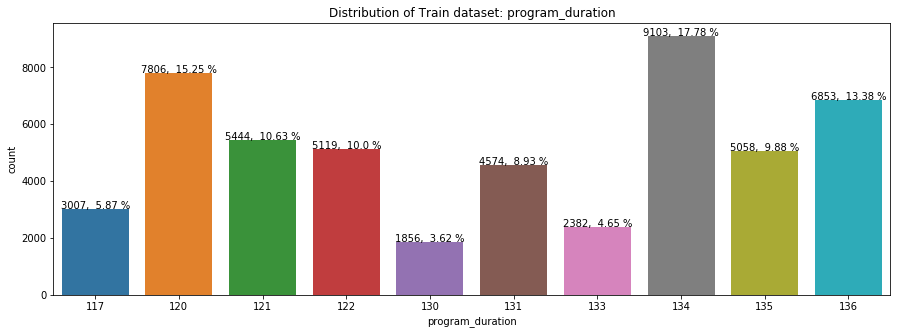

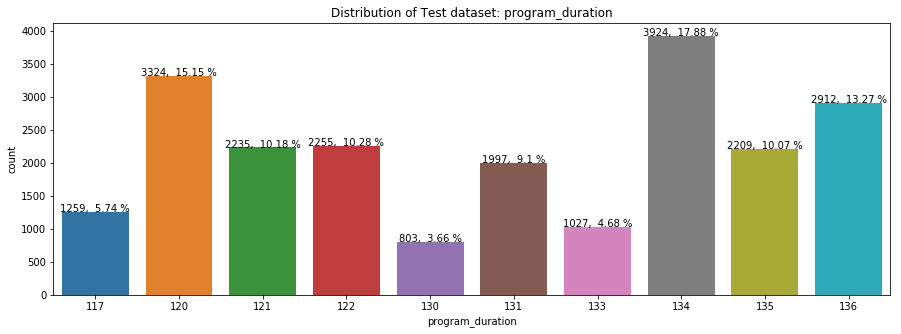

In [14]:
plot_bar_counts_categorical(TrainData['program_duration'], 'Train dataset: program_duration', (15,5))
plot_bar_counts_categorical(TestData['program_duration'], 'Test dataset: program_duration', (15,5))

In [15]:
TrainData.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
72064,8620_58,U_1,U,134,58,offline,intermediate,8620,M,High School Diploma,1,46.0,2,N,4.0,1
66433,98_86,V_3,V,131,86,offline,vary hard,98,F,High School Diploma,4,NaN,2,N,1.0,0
6763,1114_21,T_3,T,134,21,offline,easy,1114,F,No Qualification,1,NaN,2,N,1.0,1
18314,2262_121,Y_4,Y,121,121,online,easy,2262,M,Matriculation,2,26.0,2,N,4.0,1
43803,6505_17,T_4,T,120,17,online,easy,6505,F,High School Diploma,4,25.0,4,N,1.0,1


In [16]:
TrainData['id'].nunique() # 51202 == TrainData.shape

51202

**We will not use 'id' columns as its a non unique feature with no values repeating**

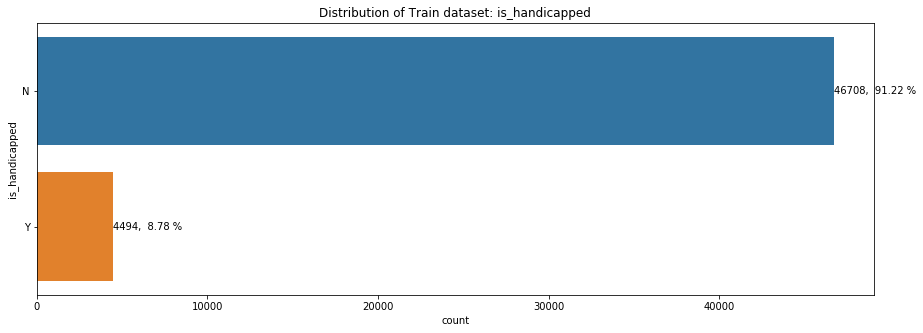

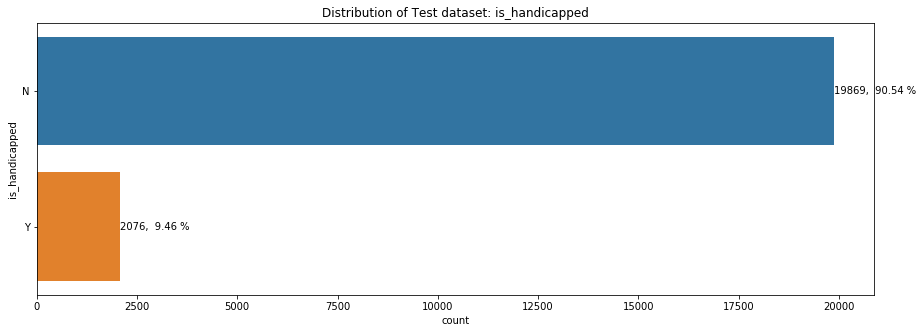

In [17]:
plot_bar_counts_categorical(TrainData['is_handicapped'], 'Train dataset: is_handicapped', (15,5))
plot_bar_counts_categorical(TestData['is_handicapped'], 'Test dataset: is_handicapped', (15,5))

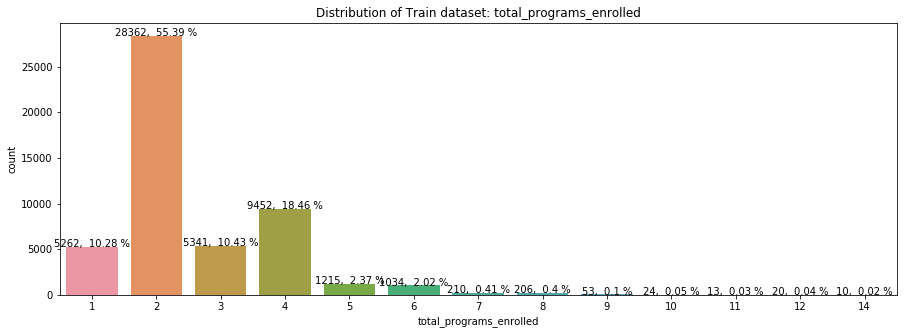

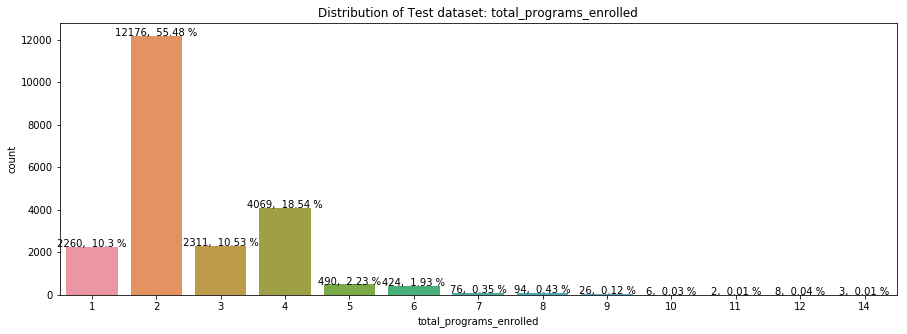

In [18]:
plot_bar_counts_categorical(TrainData['total_programs_enrolled'], 'Train dataset: total_programs_enrolled', (15,5))
plot_bar_counts_categorical(TestData['total_programs_enrolled'], 'Test dataset: total_programs_enrolled', (15,5))

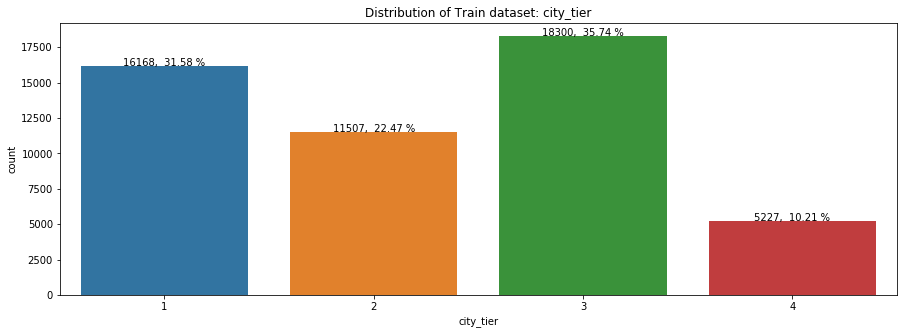

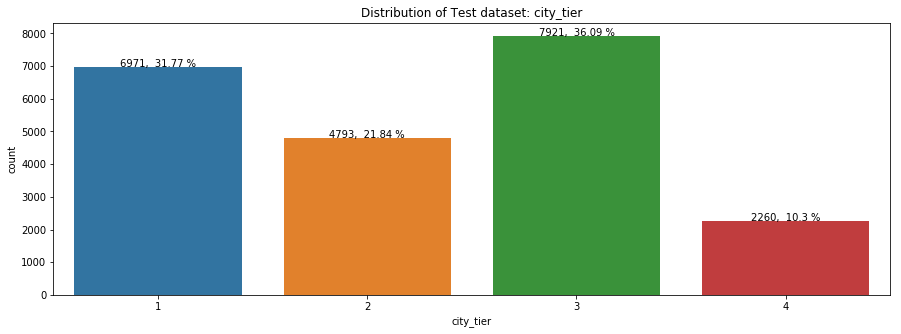

In [19]:
plot_bar_counts_categorical(TrainData['city_tier'], 'Train dataset: city_tier', (15,5))
plot_bar_counts_categorical(TestData['city_tier'], 'Test dataset: city_tier', (15,5))

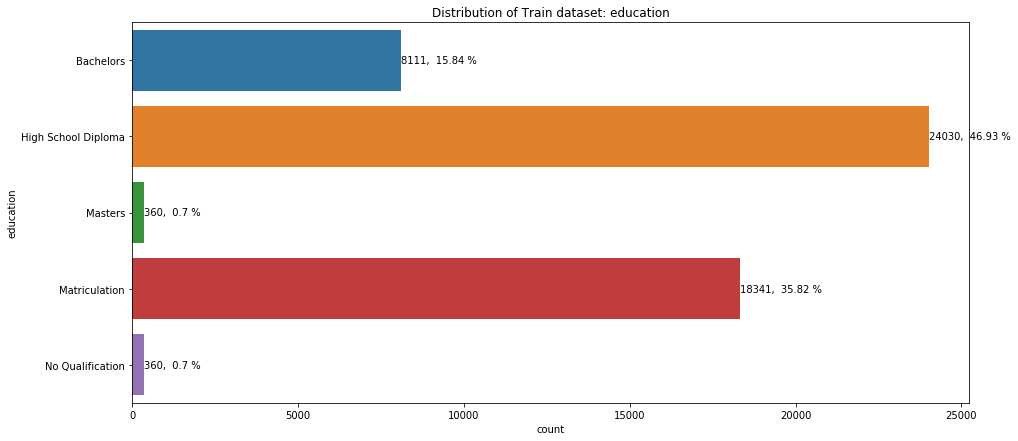

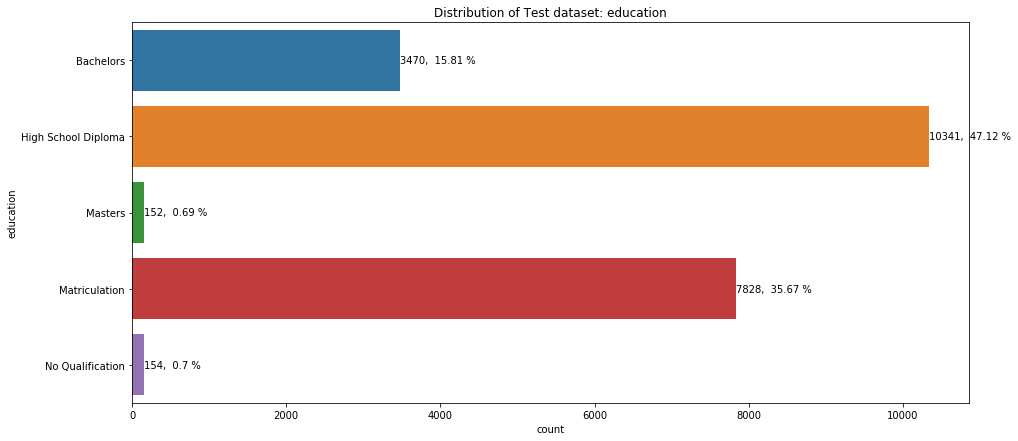

In [20]:
plot_bar_counts_categorical(TrainData['education'], 'Train dataset: education', (15,7))
plot_bar_counts_categorical(TestData['education'], 'Test dataset: education', (15,7))

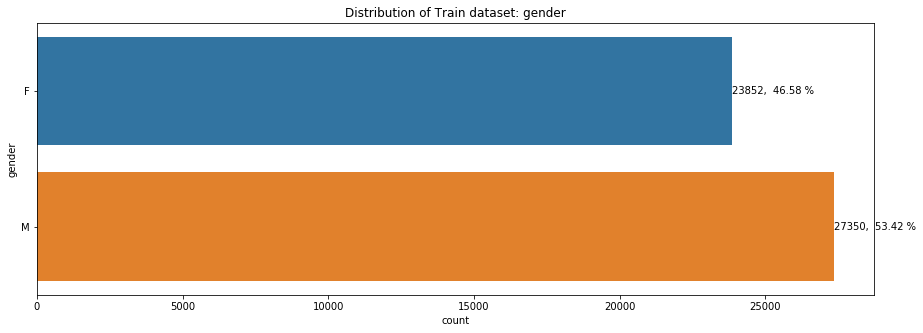

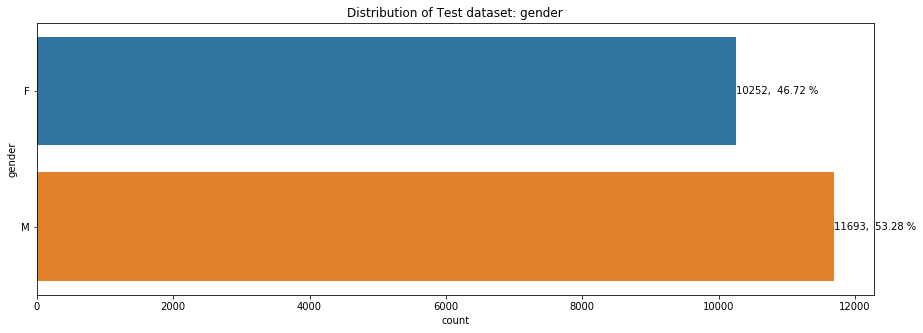

In [21]:
plot_bar_counts_categorical(TrainData['gender'], 'Train dataset: gender', (15,5))
plot_bar_counts_categorical(TestData['gender'], 'Test dataset: gender', (15,5))

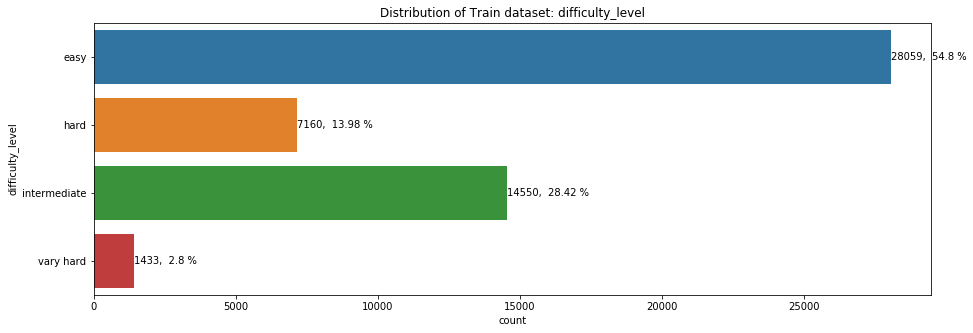

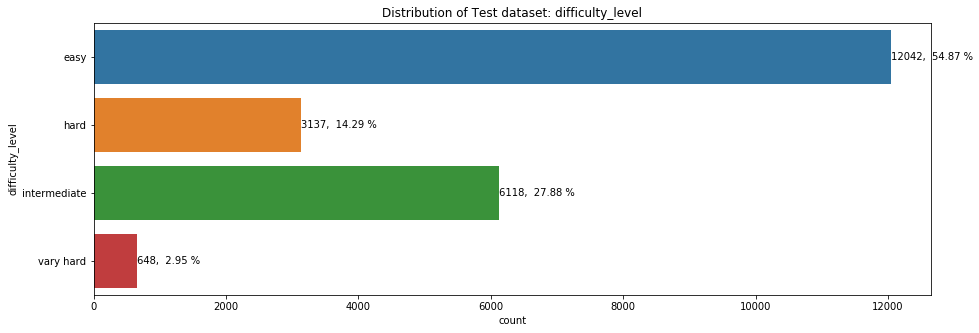

In [22]:
plot_bar_counts_categorical(TrainData['difficulty_level'], 'Train dataset: difficulty_level', (15,5))
plot_bar_counts_categorical(TestData['difficulty_level'], 'Test dataset: difficulty_level', (15,5))

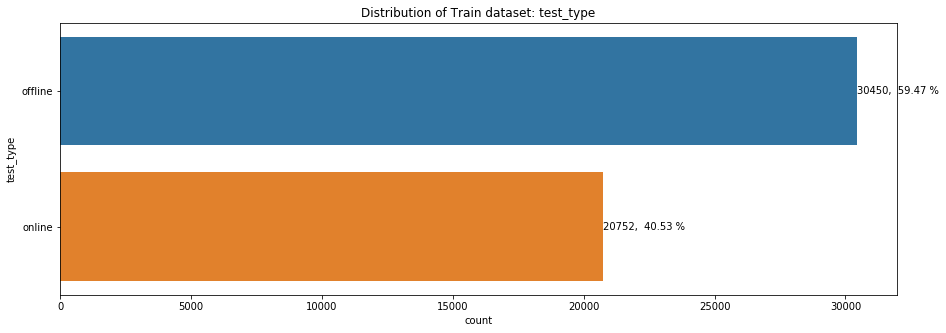

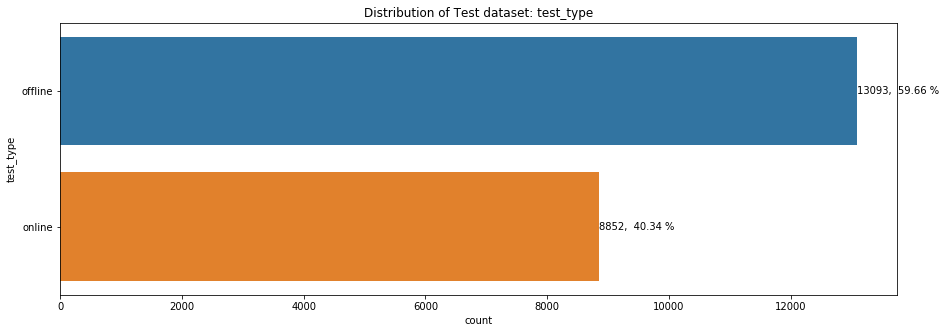

In [23]:
plot_bar_counts_categorical(TrainData['test_type'], 'Train dataset: test_type', (15,5))
plot_bar_counts_categorical(TestData['test_type'], 'Test dataset: test_type', (15,5))

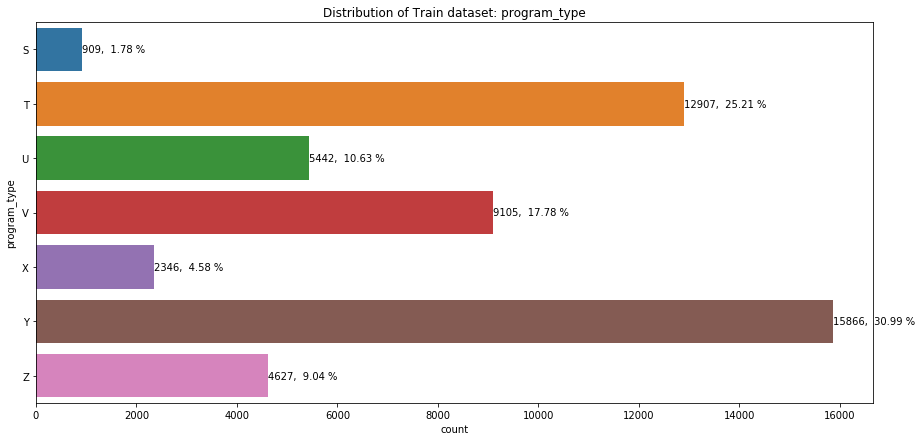

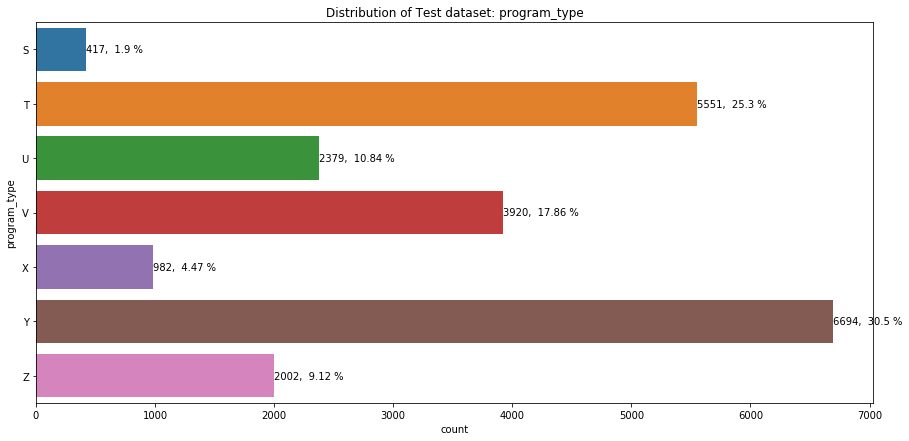

In [24]:
plot_bar_counts_categorical(TrainData['program_type'], 'Train dataset: program_type', (15,7))
plot_bar_counts_categorical(TestData['program_type'], 'Test dataset: program_type', (15,7))

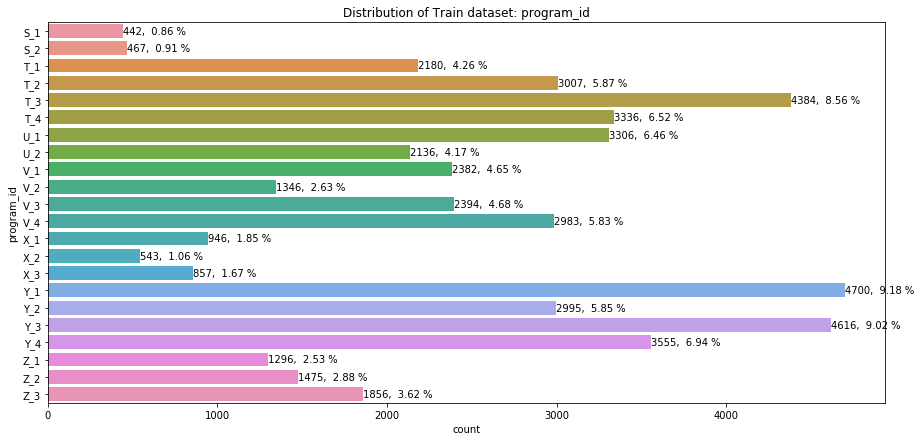

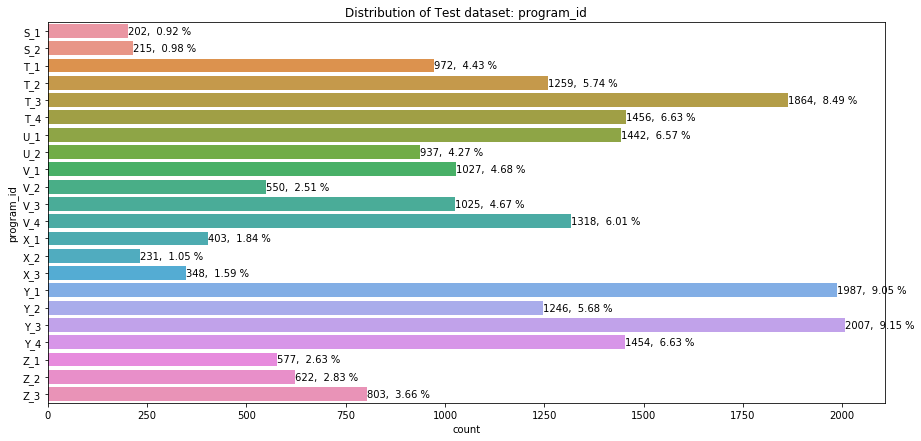

In [25]:
plot_bar_counts_categorical(TrainData['program_id'], 'Train dataset: program_id', (15,7))
plot_bar_counts_categorical(TestData['program_id'], 'Test dataset: program_id', (15,7))

### Output Variable ---> 'is_pass'

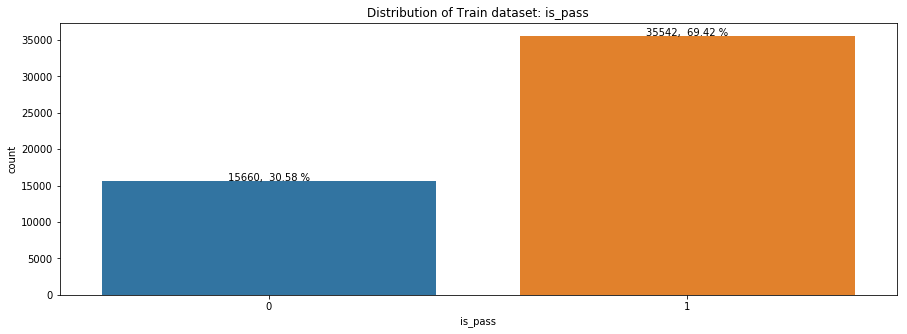

In [26]:
plot_bar_counts_categorical(TrainData['is_pass'], 'Train dataset: is_pass', (15,5))

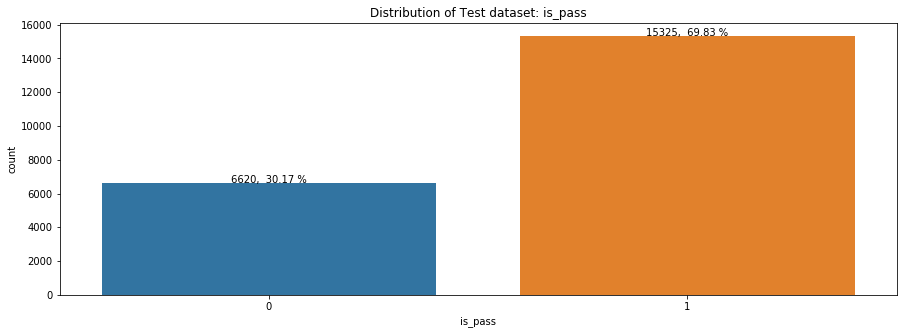

In [27]:
plot_bar_counts_categorical(TestData['is_pass'], 'Test dataset: is_pass', (15,5))

/home/jatin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


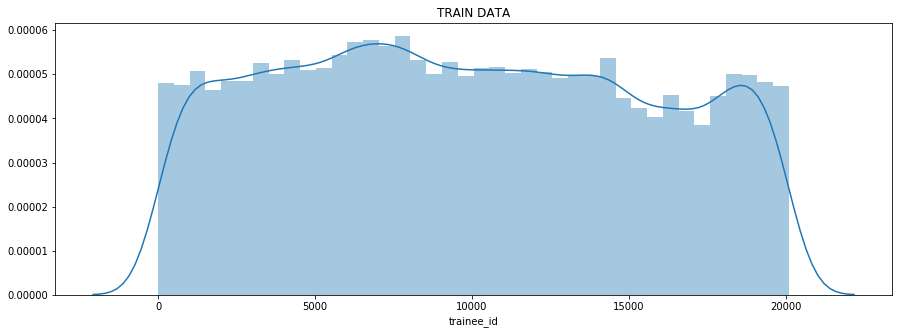

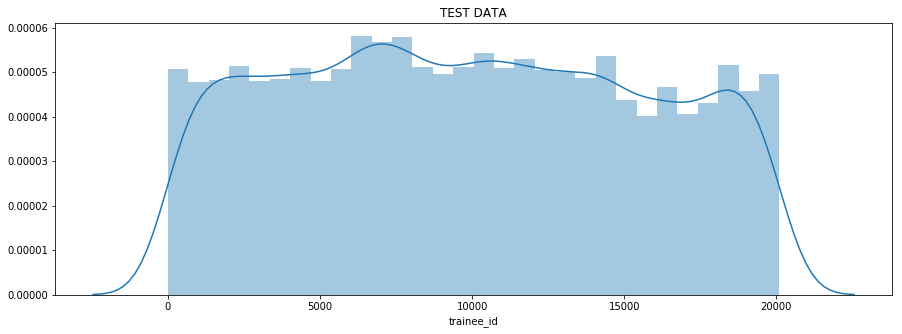

In [28]:
plt.figure(figsize=(15, 5))
sns.distplot(TrainData["trainee_id"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 5))
sns.distplot(TestData["trainee_id"])
plt.title('TEST DATA')
plt.show()

In [48]:
#finding the test_id in which trainees appeared the most in traing dataset
max(TrainData['test_id'])

187

In [49]:
#finding the test_id in which trainees appeared the most in test dataset
max(TestData['test_id'])

187

# Bivariate Analysis

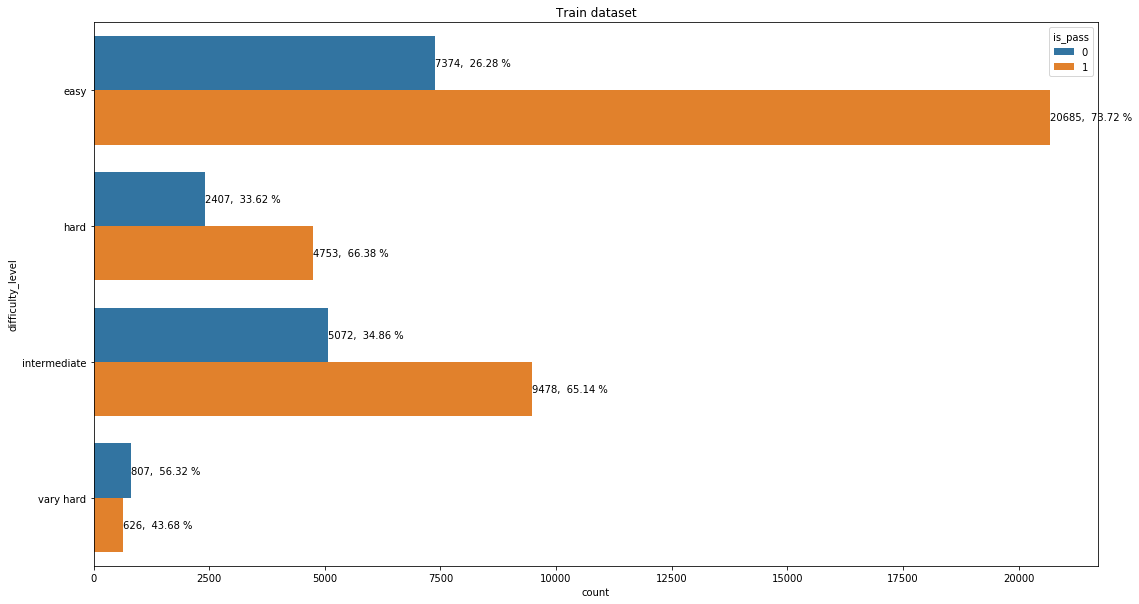

In [29]:
count_plot_by_hue(TrainData['difficulty_level'], TrainData['is_pass'].astype(str), 'Train dataset', (18,10))

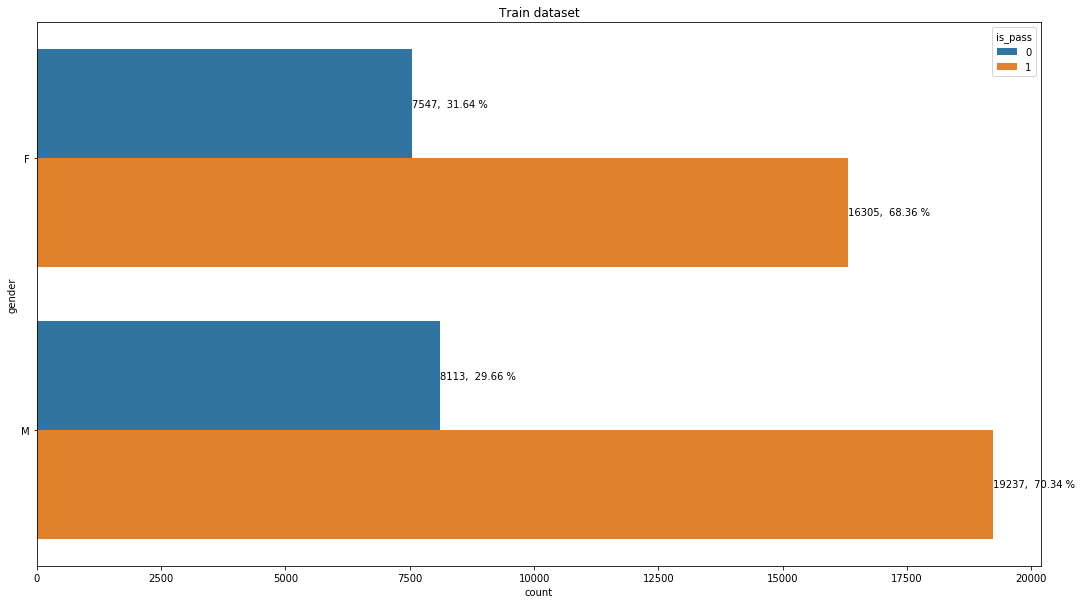

In [30]:
count_plot_by_hue(TrainData['gender'], TrainData['is_pass'].astype(str), 'Train dataset', (18,10))

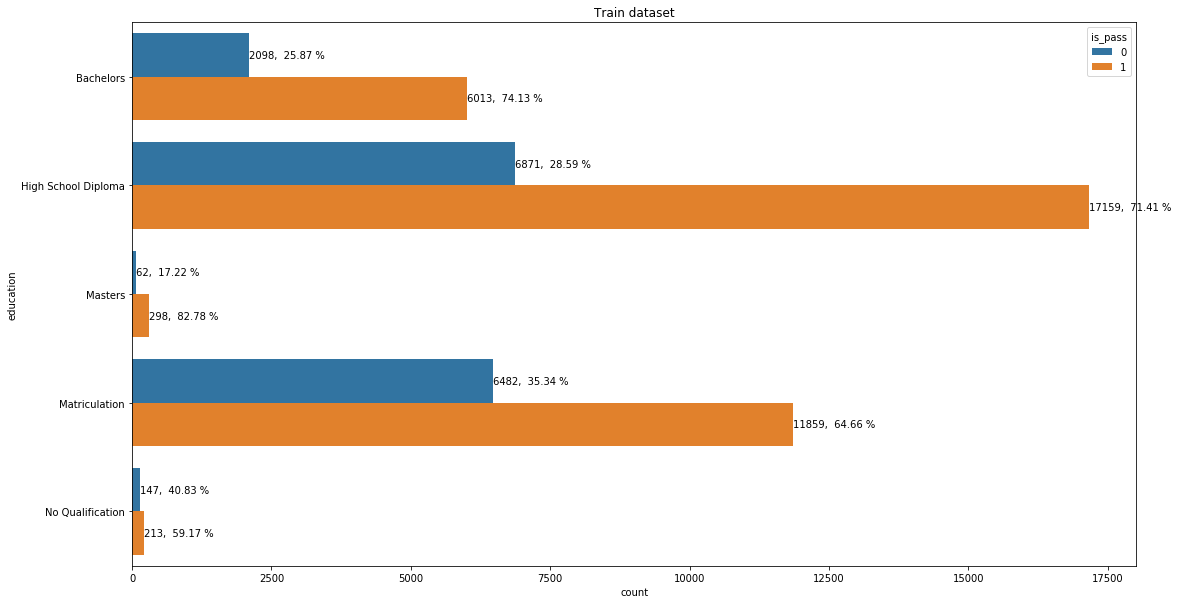

In [31]:
count_plot_by_hue(TrainData['education'], TrainData['is_pass'].astype(str), 'Train dataset', (18,10))

In [32]:
TrainData.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

# Next Task --> To Fill Null Values in 'age' & 'trainee_engagement_rating':

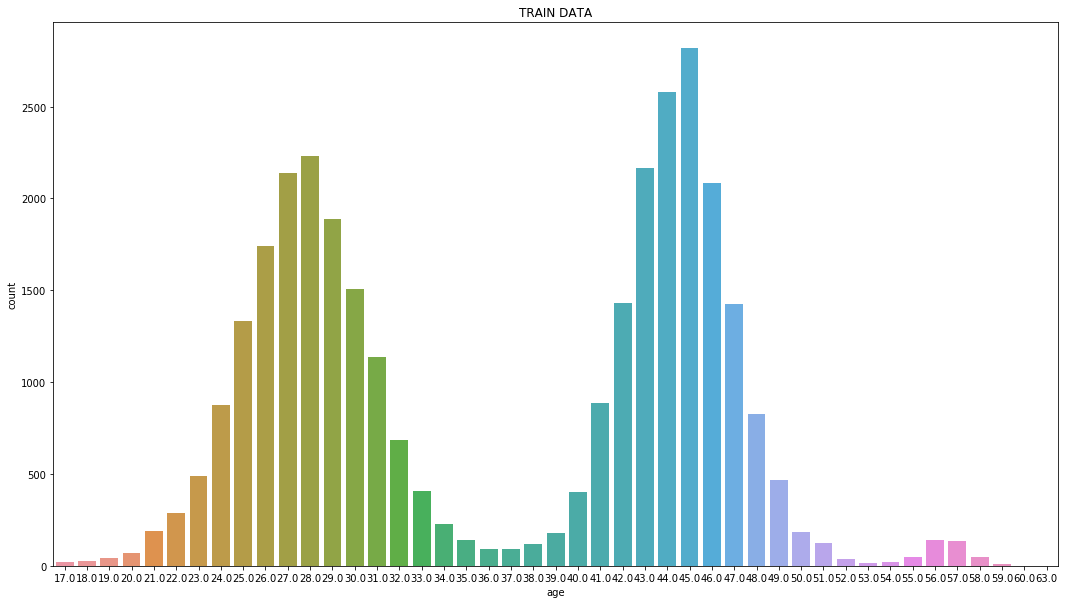

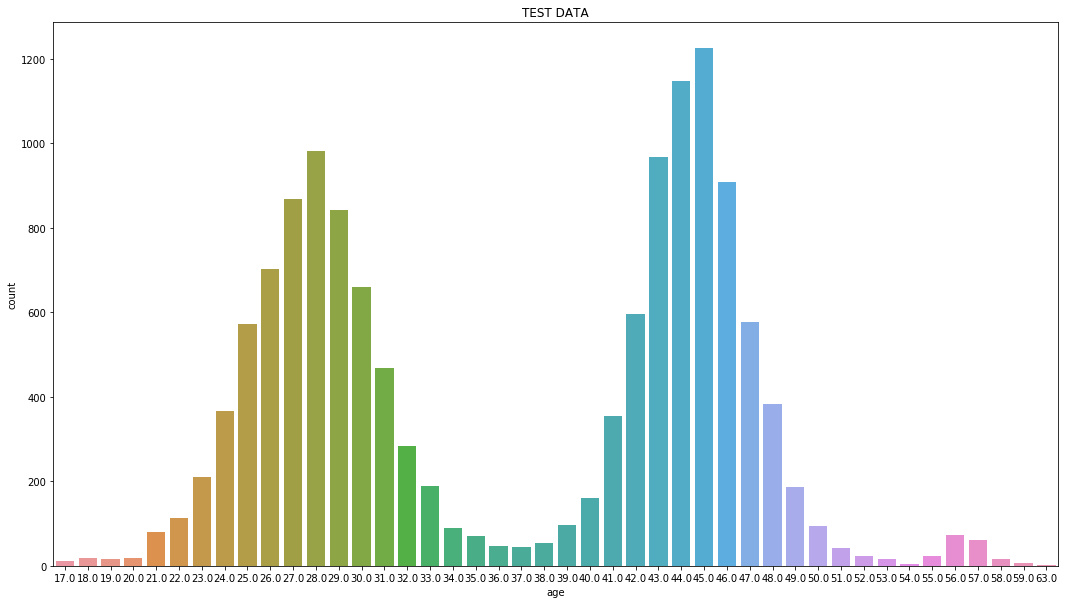

In [33]:
plt.figure(figsize=(18, 10))
sns.countplot(TrainData["age"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(18, 10))
sns.countplot(TestData["age"])
plt.title('TEST DATA')
plt.show()

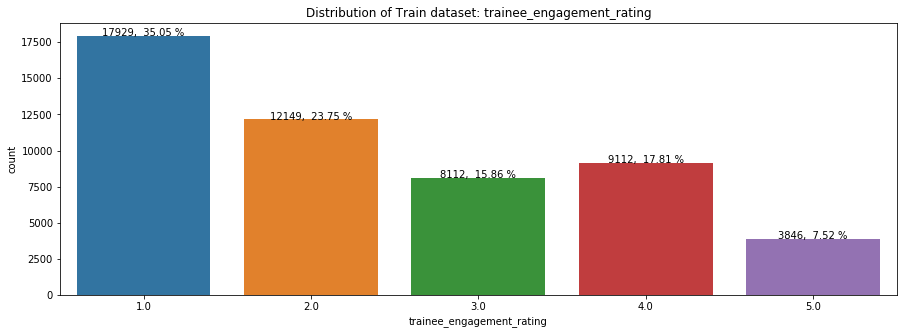

In [34]:
plot_bar_counts_categorical(TrainData['trainee_engagement_rating'], 'Train dataset: trainee_engagement_rating', (15,5))

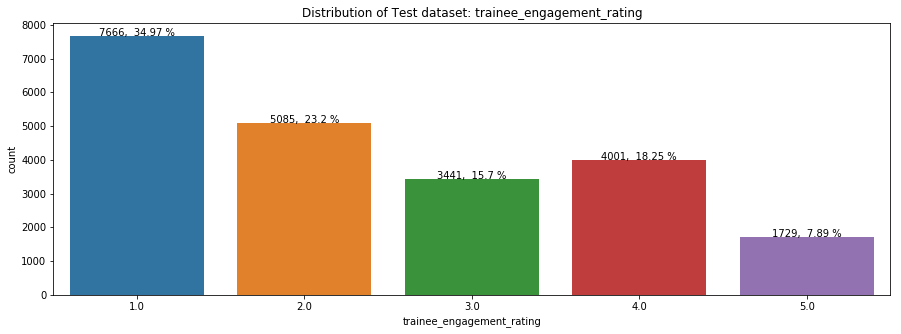

In [35]:
plot_bar_counts_categorical(TestData['trainee_engagement_rating'], 'Test dataset: trainee_engagement_rating', (15,5))

### Filling Missing Values

In [38]:
#filling the 'trainee_engagement_rating' using mode of the column
TrainData['trainee_engagement_rating'].fillna(TrainData['trainee_engagement_rating'].mode()[0],inplace=True)
TestData['trainee_engagement_rating'].fillna(TrainData['trainee_engagement_rating'].mode()[0],inplace=True)

# filling the 'age' using the median of the column
TrainData['age'].fillna(TrainData['age'].median(),inplace=True)
TestData['age'].fillna(TestData['age'].median(),inplace=True)

In [39]:
# checking missing data percentage in Train data
total = TrainData.isnull().sum().sort_values(ascending = False)
percent = (TrainData.isnull().sum()/TrainData.isnull().count()*100).sort_values(ascending = False)
missing_TestData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TestData.head(30)

,Total,Percent
is_pass,0,0.0
trainee_engagement_rating,0,0.0
is_handicapped,0,0.0
total_programs_enrolled,0,0.0
age,0,0.0
city_tier,0,0.0
education,0,0.0
gender,0,0.0
trainee_id,0,0.0
difficulty_level,0,0.0


In [40]:
# checking missing data percentage in test data
total = TestData.isnull().sum().sort_values(ascending = False)
percent = (TestData.isnull().sum()/TestData.isnull().count()*100).sort_values(ascending = False)
missing_TestData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TestData.head(30)

,Total,Percent
is_pass,0,0.0
trainee_engagement_rating,0,0.0
is_handicapped,0,0.0
total_programs_enrolled,0,0.0
age,0,0.0
city_tier,0,0.0
education,0,0.0
gender,0,0.0
trainee_id,0,0.0
difficulty_level,0,0.0


# MODEL

In [41]:
TrainData.head(1)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
72064,8620_58,U_1,U,134,58,offline,intermediate,8620,M,High School Diploma,1,46.0,2,N,4.0,1


In [42]:
TestData.head(1)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
19412,4011_100,V_1,V,133,100,offline,vary hard,4011,F,High School Diploma,4,40.0,2,N,2.0,1


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
X_Train=TrainData
X_Test=TestData

In [45]:
#LabelEncoder encodes the qualitative features into numercial values
le_pid = LabelEncoder()
le_ptype = LabelEncoder()
le_ttest = LabelEncoder()
le_difflev = LabelEncoder()
le_gend = LabelEncoder()
le_edu = LabelEncoder()
le_handi = LabelEncoder()

X_Train['program_id_enc'] = le_pid.fit_transform(X_Train['program_id'])
X_Train['program_type_enc'] = le_ptype.fit_transform(X_Train['program_type'])
X_Train['test_type_enc'] = le_ttest.fit_transform(X_Train['test_type'])
X_Train['difficulty_level_enc'] = le_difflev.fit_transform(X_Train['difficulty_level'])
X_Train['gender_enc'] = le_gend.fit_transform(X_Train['gender'])
X_Train['education_enc'] = le_edu.fit_transform(X_Train['education'])
X_Train['is_handicapped_enc'] = le_handi.fit_transform(X_Train['is_handicapped'])

/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [46]:
X_Test['program_id_enc'] = le_pid.transform(X_Test['program_id'])
X_Test['program_type_enc'] = le_ptype.transform(X_Test['program_type'])
X_Test['test_type_enc'] = le_ttest.transform(X_Test['test_type'])
X_Test['difficulty_level_enc'] = le_difflev.transform(X_Test['difficulty_level'])
X_Test['gender_enc'] = le_gend.transform(X_Test['gender'])
X_Test['education_enc'] = le_edu.transform(X_Test['education'])
X_Test['is_handicapped_enc'] = le_handi.transform(X_Test['is_handicapped'])

/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [274]:
X_Train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
72064,8620_58,U_1,U,134,58,offline,intermediate,8620,M,High School Diploma,...,N,4.0,1,6,2,0,2,1,1,0
66433,98_86,V_3,V,131,86,offline,vary hard,98,F,High School Diploma,...,N,1.0,0,10,3,0,3,0,1,0
6763,1114_21,T_3,T,134,21,offline,easy,1114,F,No Qualification,...,N,1.0,1,4,1,0,0,0,4,0
18314,2262_121,Y_4,Y,121,121,online,easy,2262,M,Matriculation,...,N,4.0,1,18,5,1,0,1,3,0
43803,6505_17,T_4,T,120,17,online,easy,6505,F,High School Diploma,...,N,1.0,1,5,1,1,0,0,1,0


In [275]:
X_Test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
19412,4011_100,V_1,V,133,100,offline,vary hard,4011,F,High School Diploma,...,N,2.0,1,8,3,0,3,0,1,0
6836,5560_17,T_4,T,120,17,online,easy,5560,F,High School Diploma,...,N,2.0,0,5,1,1,0,0,1,0
15843,13694_175,Z_2,Z,120,175,online,easy,13694,M,Matriculation,...,N,1.0,1,20,6,1,0,1,3,0
37098,14366_91,V_2,V,121,91,offline,intermediate,14366,F,Matriculation,...,N,1.0,0,9,3,0,2,0,3,0
13447,14793_100,V_1,V,133,100,offline,vary hard,14793,F,High School Diploma,...,N,3.0,0,8,3,0,3,0,1,0


In [276]:
#Showing all the columns of the X_Train
X_Train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass', 'program_id_enc',
       'program_type_enc', 'test_type_enc', 'difficulty_level_enc',
       'gender_enc', 'education_enc', 'is_handicapped_enc'],
      dtype='object')

In [277]:
X_Train.head(1)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
72064,8620_58,U_1,U,134,58,offline,intermediate,8620,M,High School Diploma,...,N,4.0,1,6,2,0,2,1,1,0


In [278]:
#Dropping extra columns from the datasets
X_Train = X_Train.drop(['id','is_pass','program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped'], axis=1)

X_Test = X_Test.drop(['id','is_pass','program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped'], axis=1)

In [279]:
X_Train.head(1)

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
72064,134,58,8620,1,46.0,2,4.0,6,2,0,2,1,1,0


In [280]:
X_Test.head(1)

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
19412,133,100,4011,4,40.0,2,2.0,8,3,0,3,0,1,0


# 1 MODEL:

### Decision Tree 

In [284]:
dtree=DecisionTreeClassifier(criterion='gini', random_state=0)
dtree.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [285]:
Y_Test_pred = dtree.predict(X_Test)

In [286]:
confusion_matrix(Y_Test_actual,Y_Test_pred)

array([[ 3416,  3204],
       [ 3404, 11921]])

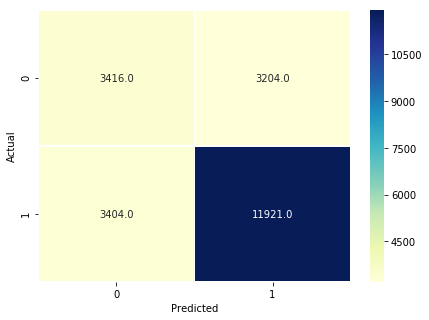

In [287]:
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(Y_Test_actual,Y_Test_pred), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [288]:
accuracy_score(Y_Test_actual,Y_Test_pred)

0.6988835725677831

### 69.8% accuracy

# 2 MODEL:

### Random Forest Classifier

In [289]:
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf_clf.fit(X_Train,Y_Train)
Y_Test_pred = rf_clf.predict(X_Test)

In [290]:
confusion_matrix(Y_Test_actual,Y_Test_pred)

array([[ 3106,  3514],
       [ 1977, 13348]])

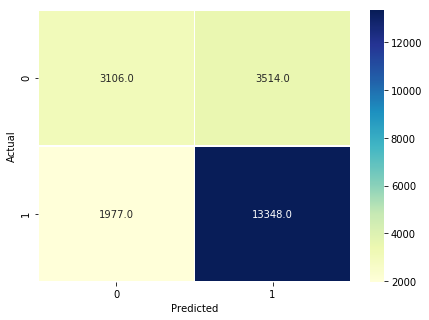

In [291]:
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(Y_Test_actual,Y_Test_pred), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [292]:
accuracy_score(Y_Test_actual,Y_Test_pred)

0.7497835497835498

### 74.9% accuracy 

# 3 MODEL:

### Logistic Regression

In [293]:
log_clf = LogisticRegression()
log_clf.fit(X_Train,Y_Train)
Y_Test_pred = log_clf.predict(X_Test)

/home/jatin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [294]:
confusion_matrix(Y_Test_actual,Y_Test_pred)

array([[  833,  5787],
       [  644, 14681]])

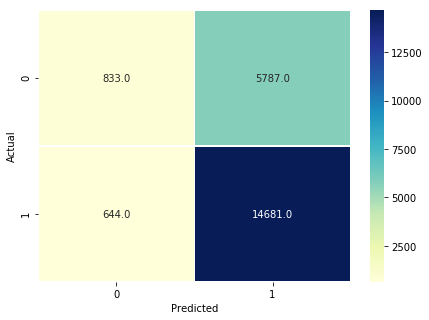

In [295]:
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(Y_Test_actual,Y_Test_pred), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [296]:
accuracy_score(Y_Test_actual,Y_Test_pred)

0.7069491911597174

### 70% accuracy

In [297]:
TrainData.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
72064,8620_58,U_1,U,134,58,offline,intermediate,8620,M,High School Diploma,...,N,4.0,1,6,2,0,2,1,1,0
66433,98_86,V_3,V,131,86,offline,vary hard,98,F,High School Diploma,...,N,1.0,0,10,3,0,3,0,1,0
6763,1114_21,T_3,T,134,21,offline,easy,1114,F,No Qualification,...,N,1.0,1,4,1,0,0,0,4,0
18314,2262_121,Y_4,Y,121,121,online,easy,2262,M,Matriculation,...,N,4.0,1,18,5,1,0,1,3,0
43803,6505_17,T_4,T,120,17,online,easy,6505,F,High School Diploma,...,N,1.0,1,5,1,1,0,0,1,0


In [298]:
TestData.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc
19412,4011_100,V_1,V,133,100,offline,vary hard,4011,F,High School Diploma,...,N,2.0,1,8,3,0,3,0,1,0
6836,5560_17,T_4,T,120,17,online,easy,5560,F,High School Diploma,...,N,2.0,0,5,1,1,0,0,1,0
15843,13694_175,Z_2,Z,120,175,online,easy,13694,M,Matriculation,...,N,1.0,1,20,6,1,0,1,3,0
37098,14366_91,V_2,V,121,91,offline,intermediate,14366,F,Matriculation,...,N,1.0,0,9,3,0,2,0,3,0
13447,14793_100,V_1,V,133,100,offline,vary hard,14793,F,High School Diploma,...,N,3.0,0,8,3,0,3,0,1,0


# Feature Engineering Step

In [299]:
#replace the 'program_id' column with 'program_id_no'
TrainData["program_id_no"] = TrainData["program_id"].str[2:].astype(int)
TestData["program_id_no"] = TestData["program_id"].str[2:].astype(int)

/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jatin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


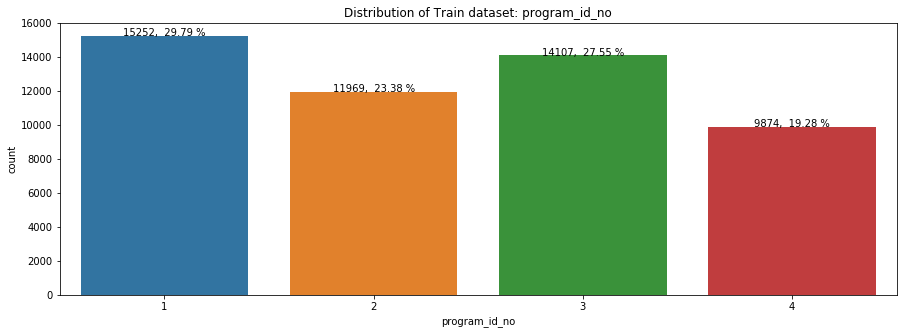

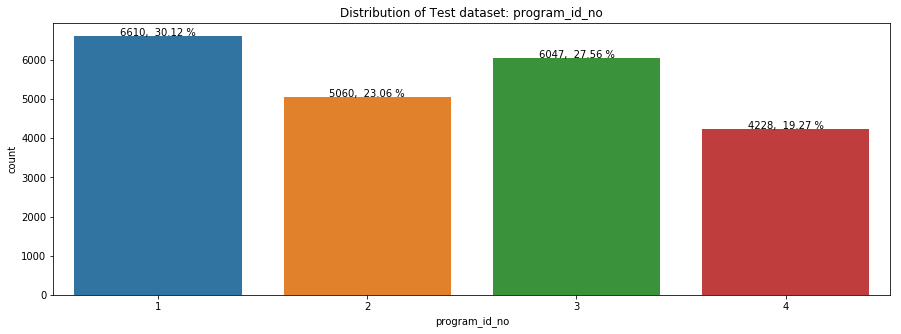

In [300]:
plot_bar_counts_categorical(TrainData['program_id_no'], 'Train dataset: program_id_no', (15,5))
plot_bar_counts_categorical(TestData['program_id_no'], 'Test dataset: program_id_no', (15,5))

In [304]:
X_Train['program_id_no'] = TrainData['program_id_no']
X_Test['program_id_no'] = TestData['program_id_no']

In [305]:
X_Train.head(1)

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,program_id_enc,program_type_enc,test_type_enc,difficulty_level_enc,gender_enc,education_enc,is_handicapped_enc,program_id_no
72064,134,58,8620,1,46.0,2,4.0,6,2,0,2,1,1,0,1


### Again Applying the 3 classification algorithms

### MODEL 1: Decision Tree

In [307]:
dtree=DecisionTreeClassifier(criterion='gini', random_state=0)
dtree.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [308]:
Y_Test_pred = dtree.predict(X_Test)

In [309]:
confusion_matrix(Y_Test_actual,Y_Test_pred)

array([[ 3419,  3201],
       [ 3434, 11891]])

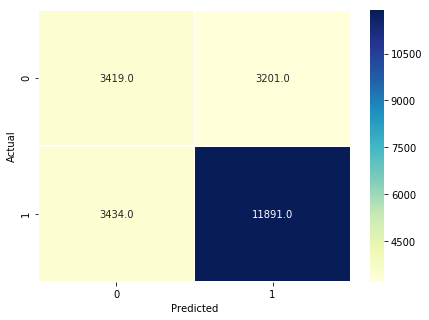

In [310]:
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(Y_Test_actual,Y_Test_pred), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [311]:
accuracy_score(Y_Test_actual,Y_Test_pred)

0.6976532239690134

### 69.76% accuracy

### MODEL 2: Random Forest

In [313]:
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf_clf.fit(X_Train,Y_Train)
Y_Test_pred = rf_clf.predict(X_Test)

In [314]:
confusion_matrix(Y_Test_actual,Y_Test_pred)

array([[ 3077,  3543],
       [ 1949, 13376]])

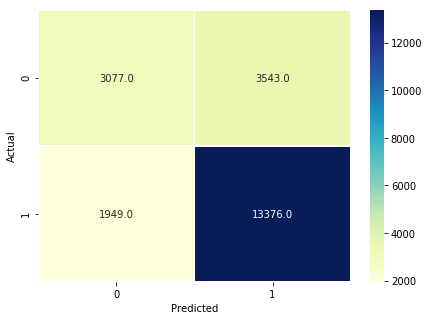

In [315]:
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(Y_Test_actual,Y_Test_pred), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [316]:
accuracy_score(Y_Test_actual,Y_Test_pred)

0.7497379813169287

### 74.97% accuracy

### MODEL 3: Logistic Regression

In [318]:
log_clf = LogisticRegression()
log_clf.fit(X_Train,Y_Train)
Y_Test_pred = log_clf.predict(X_Test)

/home/jatin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [319]:
confusion_matrix(Y_Test_actual,Y_Test_pred)

array([[  898,  5722],
       [  704, 14621]])

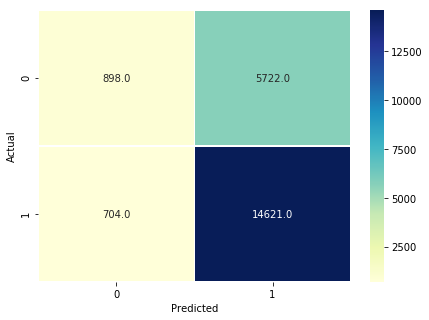

In [320]:
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(Y_Test_actual,Y_Test_pred), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [321]:
accuracy_score(Y_Test_actual,Y_Test_pred)

0.707177033492823

### 70.71% accuracy